# Linear Algebra

Full HD movie has a resolution of 1920 x 1080. And the movie has a frame rate of 24 frames per second. The movie is in colour, that is it has 3 channels: R, G, B. 

What is the number of bits being stored every second?



In [13]:
print("Bits per sec:" + str(1920*1080*3*24*8))
print("mB per sec:" + str(1194393600/(8*1024**2)))
print("Full movie (gB):" + str(142.3*3*60*60/1024))


Bits per sec:1194393600
mB per sec:142.3828125
Full movie (gB):1500.8203125000002


### Linearly Independant Vectors

A set of vectors is linearly independant if we cannot express any of them as a linear combination of the others.

### Rank Of A Matrix

Number of linearly independant column vectors/ row vectors of the matrix

$$
\begin{bmatrix}
1 & 0 & 0 \\
1 & 0 & 0 \\
1 & 0 & 0 
\end{bmatrix}
$$
Rank: $1$
Because the first column is the independant column and the other columns can be obtained by multiplying $0$.

$$
\begin{bmatrix}
1 & 4 & 3 \\
2 & 5 & 9 \\
3 & 8 & 8 
\end{bmatrix}
$$
Rank: $3$
All columns are independant.

### Matrix Factorization

Lower traingular matrix,
$$
\begin{bmatrix}
1 & 0 & 0 \\
2 & 5 & 0 \\
3 & 8 & 8 
\end{bmatrix}
$$

Let $L$ be a lower tringular matrix and $U$ an upper tringular matrix, then if
$$
A = LU
$$

Then the operations such as inverse, multiplication are much easier.

- LR Factorization
- QR Factorization
- LU Factorization

### SVD: Singular Valued Decomposition

Consider a $m \times n$ real or complex matrix $M$. 

$$
M = UDV^T
$$

Here,
- $U$ is a $m \times m$ real or complex matrix
- $D$ is $m \times n$ rectangular diagonal diagonal matrix with non-negative real numbers on the diagonal matrix with non-negative real numbers on the diagonal.
- $V^T$ is a $n \times n$ real or complex matrix

Now,

- $D_{ii}$ the diagonal values are the singular values of $M$

- The $m$ columns of $U$ are the left singular vectors $M$. These are the eigen vectors of $MM^T$

- The $n$ colums of $V$ are the right singular vectors of $M$. These are the eigen vectors of $M^TM$

- The non-zero singular values of $M$ are the square roots of the non-zero eigenvalues of both $M^TM$ and $MM^T$

*Note:*
$U^TU = I$
$V^TV = VV^T = I$

To compute inverse,
$$
M^{-1} = (UDV^T)^{-1}
$$
$$
M^{-1} = (V^T)^{-1}D^{-1}U^{-1}
$$
$$
M^{-1} = VD^{-1}U^T
$$

The multiplication basically is,
$$
M = \sum_i D_{ii}u_iv^{T}_i
$$

Points:
- Singular values in $D$ are sorted form largest to smallest
- If $D_{ii} is close to $0$ it can be ignored.
- If $M$ has a rank then only the first n singular values are non-zero and remaining are $0$.

The number of eigen vectors you get depend on the rank.

*Computational Cost:* $2mn^2 + 11n^3$


### Low rank image examples



### Image Compression Using SVD

In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

***Excercise!***

- Download India Flag image.
- Convert it to grayscale and
- Open and display that image
- Print the dimensions of the image
- Compute the number of integers required to store this image

(360, 640)
230400


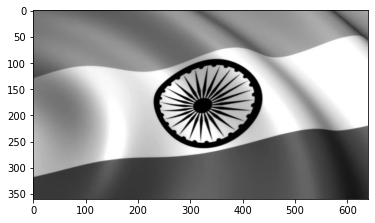

In [73]:
I = cv2.imread('/content/drive/My Drive/Images/flag.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(I, cv2.COLOR_RGB2BGR))
print(I.shape)
print(I.shape[0]*I.shape[1])

- Apply SVD on the image to get U, D, V_T.
- Note how the D matrix is returned. You may need to use other numpy functions to convert to required form of D
- Using U, D, V_T reconstruct back the image by matrix multiplication and display the image


(360, 640)
(360, 360)
(360,)
(360, 640)
(360, 640)


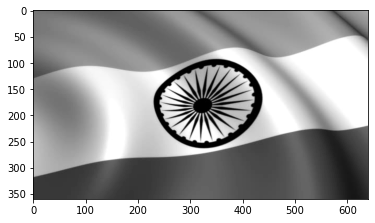

In [47]:
from numpy.linalg import svd

def applySVD(img):
  print(img.shape)
  U, D, V = svd(img, full_matrices=False)
  print(U.shape)
  print(D.shape)
  print(V.shape)
  reconst_matrix = np.dot(U[:,:], np.dot(np.diag(D[:]), V[:,:]))
  print(reconst_matrix.shape)
  return reconst_matrix
plt.imshow(applySVD(I), cmap="gray")

- Keep a variable 'component'.
- Use only the first 'component' singular values/vectors from U,D,V_T
- Reconstruct using 10 components

(360, 640)
(360, 360)
(360,)
(360, 640)
(360, 640)


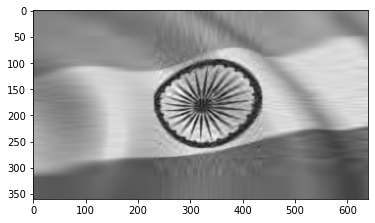

In [71]:
def applySVD(img, K):
  print(img.shape)
  U, D, V = svd(img, full_matrices=False)
  print(U.shape)
  print(D.shape)
  print(V.shape)
  reconst_matrix = np.dot(U[:,:K],np.dot(np.diag(D[:K]),V[:K,:]))
  print(reconst_matrix.shape)
  return reconst_matrix, D
img, D = applySVD(I, 25)
plt.imshow(img, cmap="gray")

(360, 640)
(360, 360)
(360,)
(360, 640)
(360, 640)
Ratio:409600.0


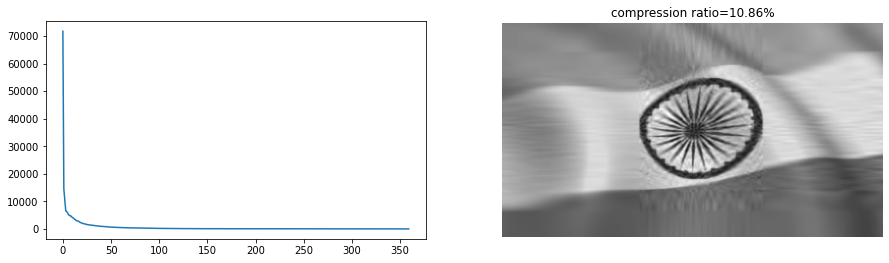

In [86]:
def compressionRatio(img, K): 
    reconst_img, D = compressSVD(img, K)
    original_shape = img.shape
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    axes[0].plot(D)
    compression_ratio =100.0* (K*(original_shape[0] + original_shape[1])+K)/(original_shape[0]*original_shape[1])
    axes[1].set_title("compression ratio={:.2f}".format(compression_ratio)+"%")
    axes[1].imshow(reconst_img,cmap='gray')
    axes[1].axis('off')
    print("Ratio:" + str((original_shape[0]*original_shape[1])/I.shape[0]*I.shape[1]))
compressionRatio(I, 25)